In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from lib.data_load.csvs import get_btcusdt_data
from lib.data_load.fear_and_greed import get_fng_data

START = "2020-01-01"
END = "2022-05-01"

btc = get_btcusdt_data(START, END)
fng = get_fng_data(days=len(btc))

df = btc.join(fng, how="left").copy()

df.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,dayofweek,fng,fng_class
date,,,,,,,,,,,,
2022-05-01,1.651363e+12,BTC/USDT,37630.80,38675.00,37386.38,38468.35,38812.24104,1.478259e+09,1021157.0,Sunday,22.0,Extreme Fear
2022-04-30,1.651277e+12,BTC/USDT,38596.11,38795.38,37578.20,37630.80,35321.18989,1.354901e+09,1017369.0,Saturday,20.0,Extreme Fear
2022-04-29,1.651190e+12,BTC/USDT,39742.06,39925.25,38175.00,38596.11,51453.65715,2.006136e+09,1101140.0,Friday,23.0,Extreme Fear
2022-04-28,1.651104e+12,BTC/USDT,39235.72,40372.63,38881.43,39742.07,56086.67150,2.223808e+09,1135242.0,Thurstday,24.0,Extreme Fear
2022-04-27,1.651018e+12,BTC/USDT,38112.64,39474.72,37881.31,39235.72,57083.12272,2.218524e+09,1232083.0,Wednesday,21.0,Extreme Fear


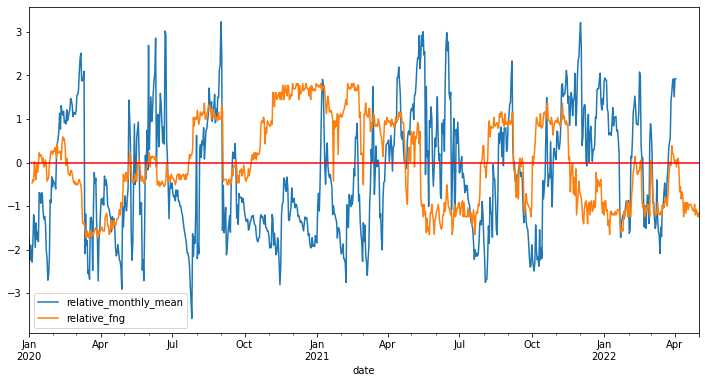

In [5]:
df = df.assign(relative_monthly_mean=(df.close - df.close.rolling(window=30).mean()) / df.close.rolling(window=30).std())
df = df.assign(relative_fng=(df.fng - df.fng.mean()) / df.fng.std())

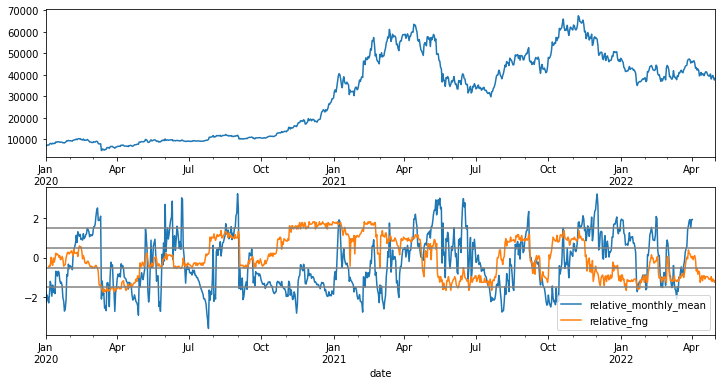

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

df.close.plot(ax=ax[0])

df[["relative_monthly_mean", "relative_fng"]].plot(ax=ax[1], figsize=(12, 6))
ax[1].axhline(0.5, color="gray")
ax[1].axhline(-0.5, color="gray")
ax[1].axhline(1.5, color="gray")
ax[1].axhline(-1.5, color="gray")

In [4]:
df[["relative_monthly_mean", "relative_fng"]].corr()

,relative_monthly_mean,relative_fng
relative_monthly_mean,1.000000,-0.030506
relative_fng,-0.030506,1.000000
